In [53]:
# --- 1) Imports ---
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import pickle

# For nicer plots in notebooks
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.grid'] = True
%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!


In [39]:
DATA_PATH = r"C:\Users\vinod\Music-App\spotify dataset.csv"

try:
    # Check if the file exists
    if not os.path.exists(DATA_PATH):
        print(f"File not found at: {DATA_PATH}")
        print("Please check the file path and try again.")
    else:
        # Read the CSV file
        df = pd.read_csv(DATA_PATH)
        print("Dataset loaded from:", DATA_PATH)
        
        # Display basic information about the dataset
        print('\nRows, Columns:', df.shape)
        print('\nColumns:\n', df.columns.tolist())
        
        # Show a preview of the data
        print('\nFirst few rows:')
        print(df.head())
        
except Exception as e:
    print("Could not load dataset from", DATA_PATH)
    print("Error:", e)
    raise

Dataset loaded from: C:\Users\vinod\Music-App\spotify dataset.csv

Rows, Columns: (32833, 23)

Columns:
 ['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

First few rows:
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity         

In [40]:
# --- 3) Quick peek ---
print('\nFirst 5 rows:')
display(df.head())

print('\nDataset info:')
df.info()


First 5 rows:


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int6

In [41]:
# --- 4) Basic cleaning ---
# 4.1: Lowercase column names and strip spaces
df.columns = [c.strip().lower() for c in df.columns]
print("Column names standardized")

# 4.2: Drop exact duplicates
before = df.shape[0]
df = df.drop_duplicates()
print(f"Dropped {before - df.shape[0]} duplicate rows")

# 4.3: Missing values overview
print('\nMissing values per column:')
print(df.isnull().sum())

# Strategy: For small numbers of missing in non-critical columns, drop rows; otherwise fill with median.
# We'll identify numeric columns to use for clustering
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('\nNumeric columns detected:', numeric_cols)

# Fill missing numeric values with column median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        med = df[col].median()
        df[col] = df[col].fillna(med)
        print(f"Filled missing numeric values in {col} with median = {med}")

# For non-numeric columns, drop rows where critical fields (like name, artist) are missing
critical_text = ['name', 'artist', 'artists', 'track_name', 'artist_name']  # common column names
for col in critical_text:
    if col in df.columns and df[col].isnull().sum() > 0:
        before = df.shape[0]
        df = df[df[col].notnull()]
        print(f"Dropped {before - df.shape[0]} rows missing {col}")

print('\nAfter cleaning, shape:', df.shape)

Column names standardized
Dropped 0 duplicate rows

Missing values per column:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Numeric columns detected: ['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Dropped 5 rows miss


Features used for clustering/plots: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


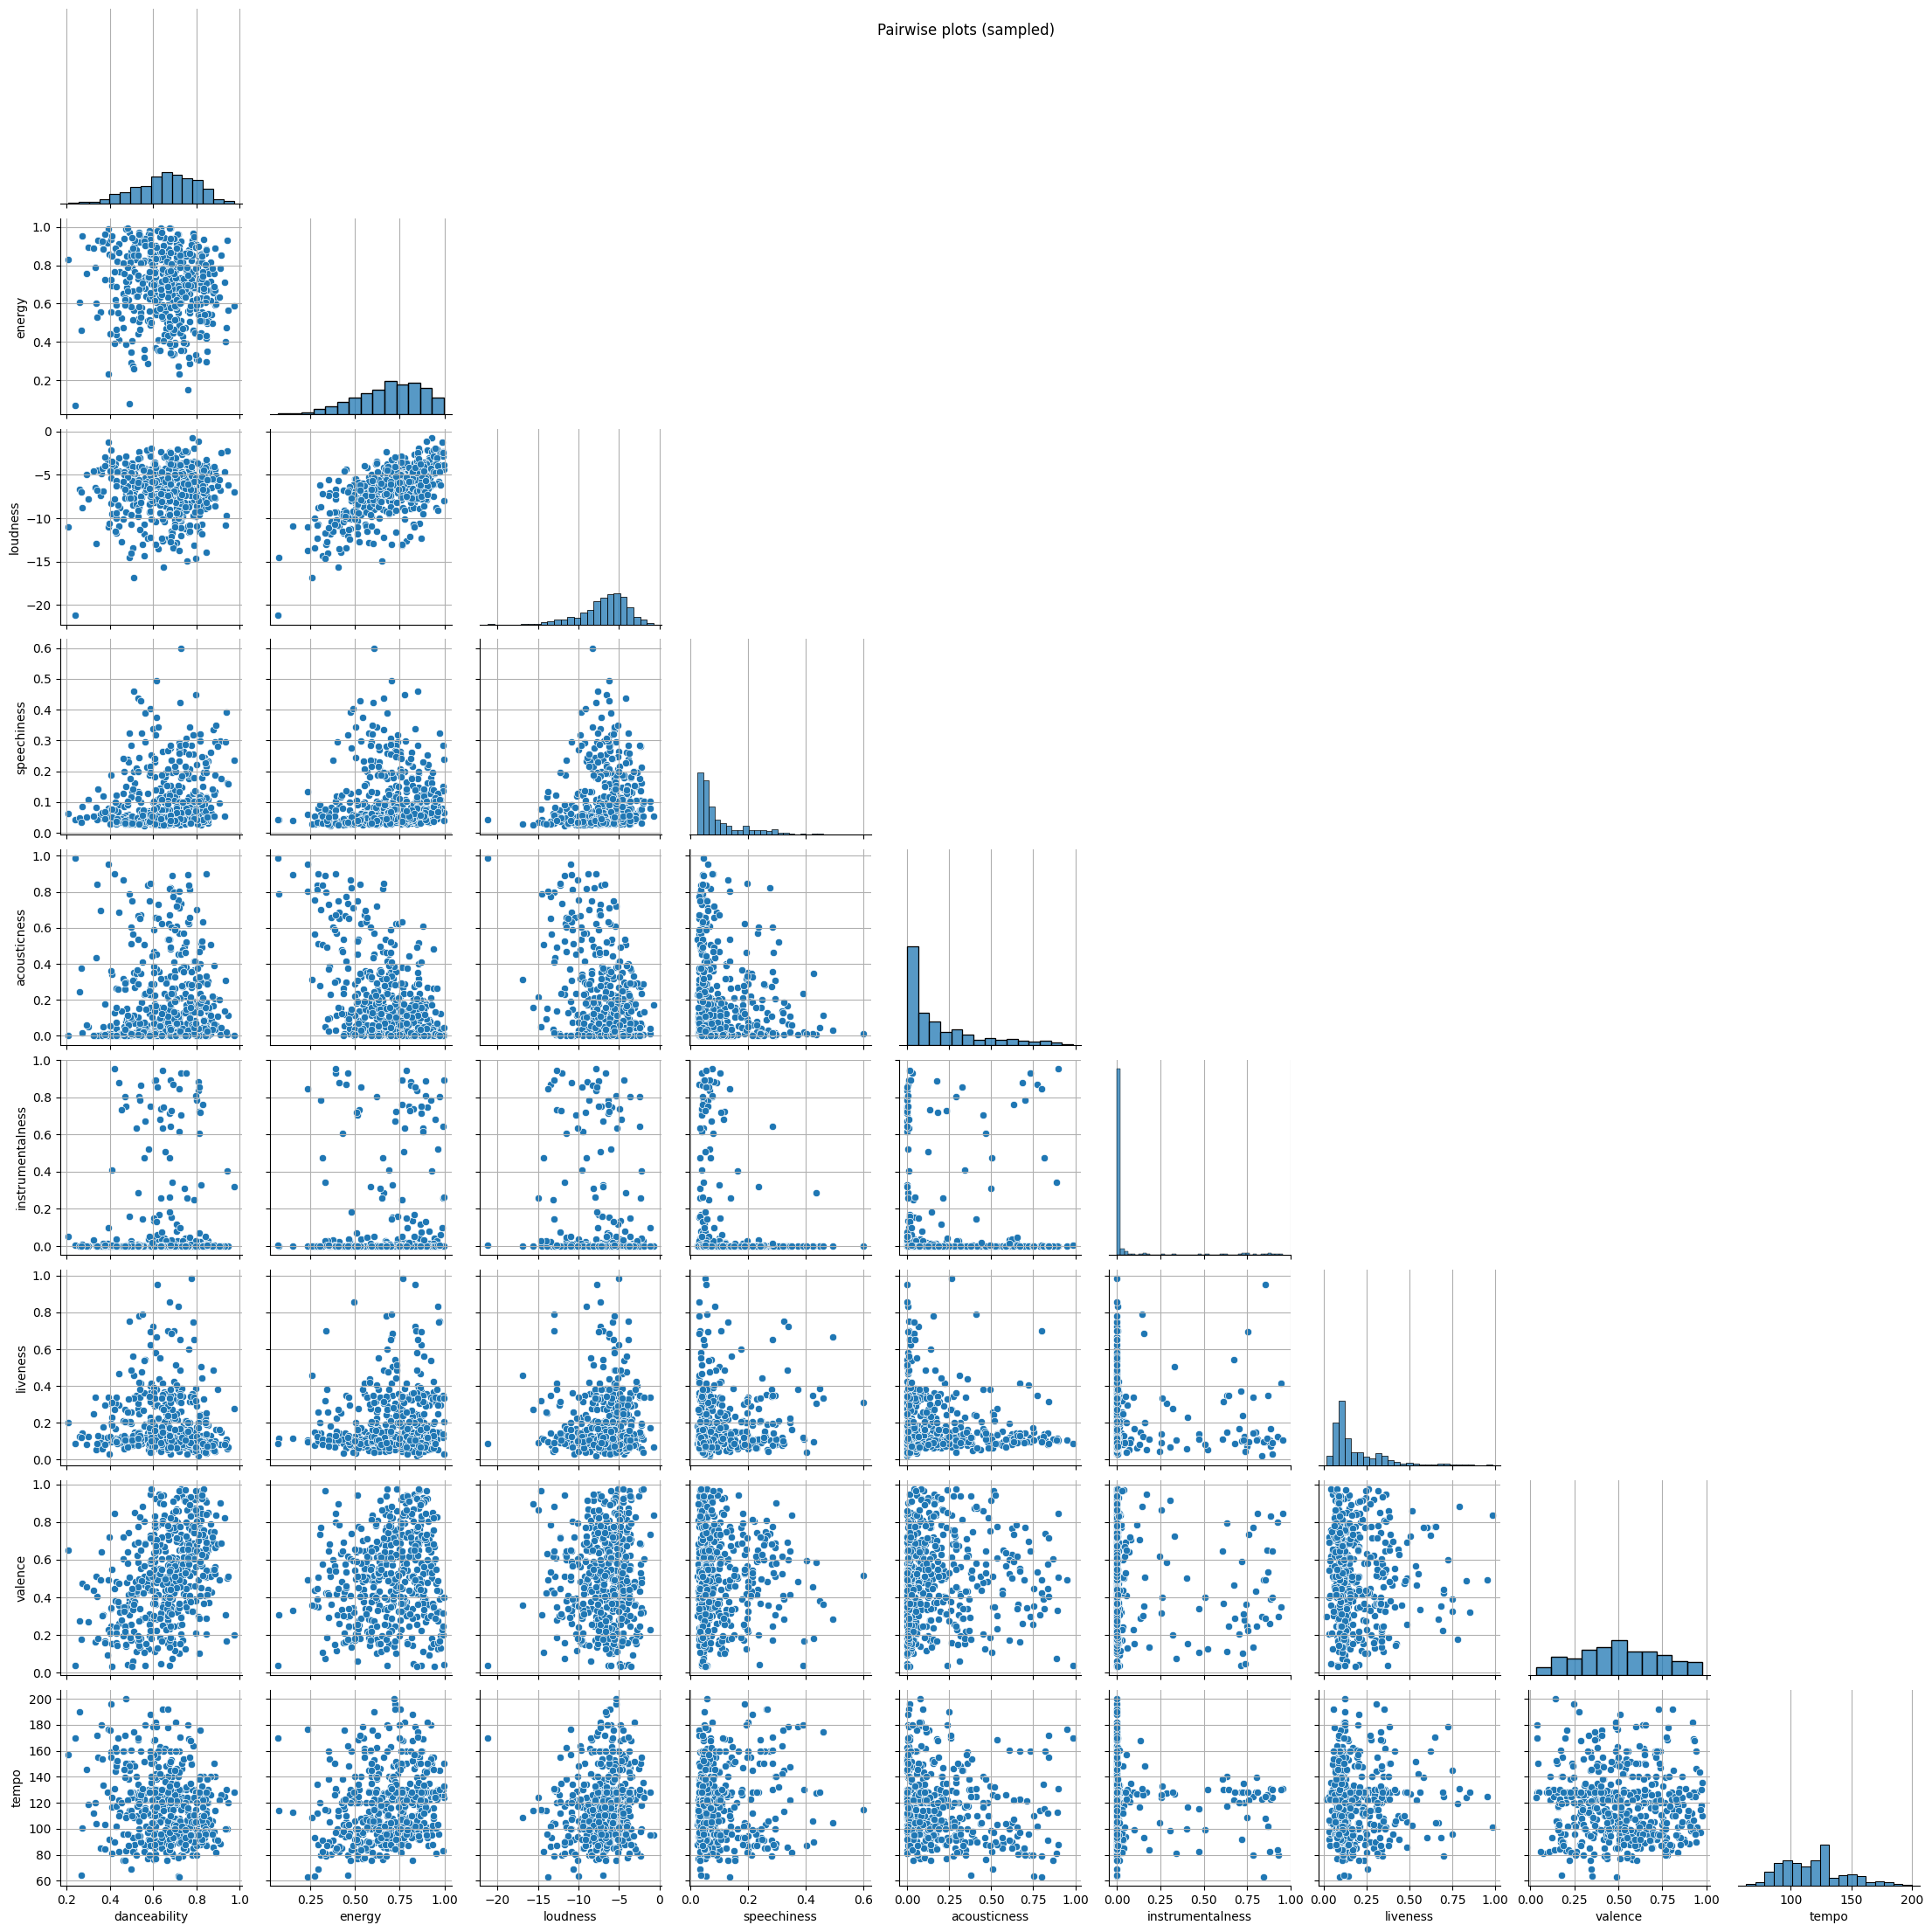

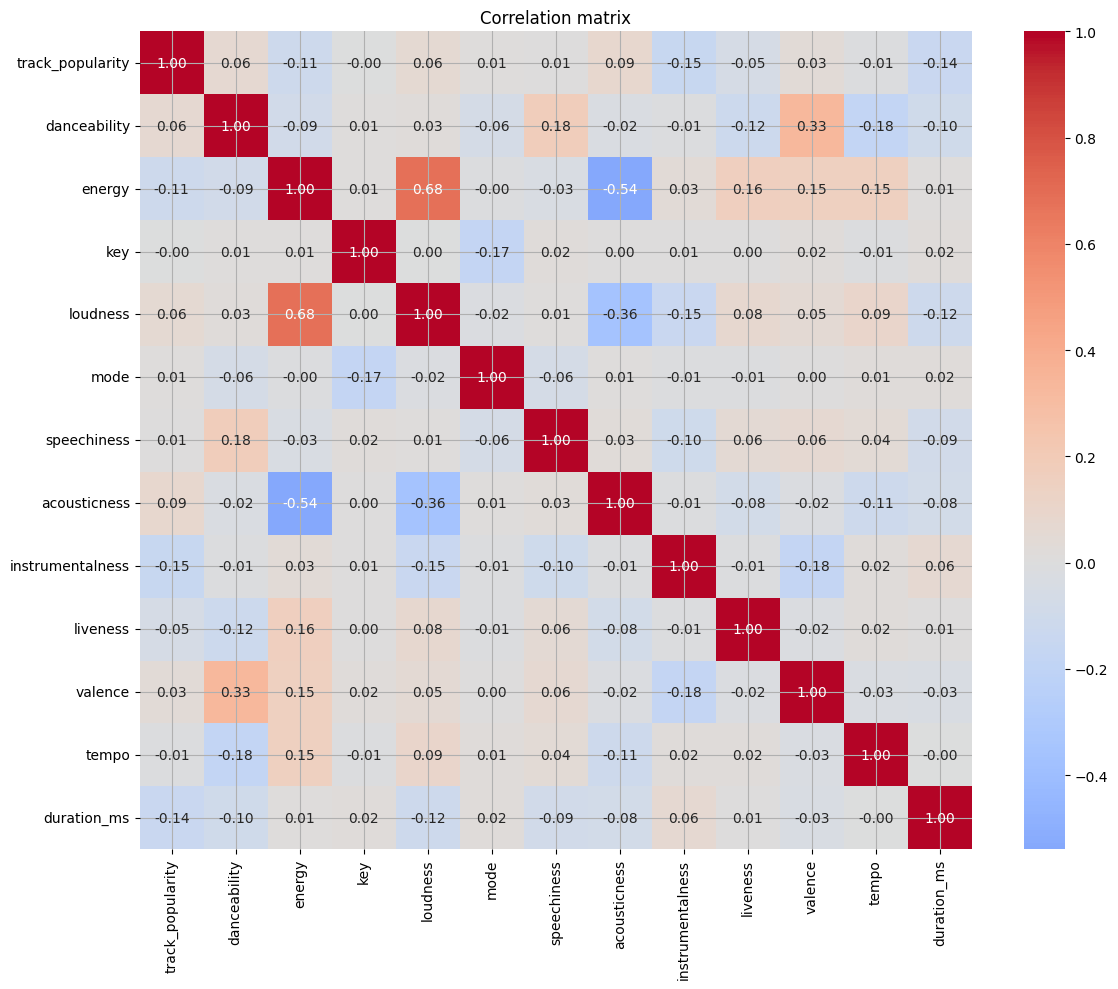

In [42]:
# --- 5) Exploratory Data Analysis (plots) ---
# 5.1: Distribution of popularity (if exists)
if 'popularity' in df.columns:
    plt.figure()
    sns.histplot(df['popularity'], bins=30, kde=True)
    plt.title('Distribution of Popularity')
    plt.xlabel('popularity')
    plt.show()

# 5.2: Pairwise scatter sample for a few audio features (if they exist)
features_to_plot = [f for f in ['danceability','energy','loudness','speechiness',
                               'acousticness','instrumentalness','liveness','valence','tempo'] 
                    if f in df.columns]
print('\nFeatures used for clustering/plots:', features_to_plot)

if len(features_to_plot) >= 2:
    # Sample to avoid overplotting
    sample_size = min(500, df.shape[0])
    sns.pairplot(df[features_to_plot].sample(sample_size), corner=True)
    plt.suptitle('Pairwise plots (sampled)')
    plt.show()

# 5.3: Correlation heatmap
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
    plt.title('Correlation matrix')
    plt.tight_layout()
    plt.show()

In [43]:
# --- 6) Prepare data for clustering ---
# Select audio feature columns - pick numeric columns that represent audio features
audio_features = [c for c in ['danceability','energy','loudness','speechiness',
                             'acousticness','instrumentalness','liveness','valence','tempo'] 
                  if c in df.columns]

if not audio_features:  # Fall back to numeric columns excluding ranking/id columns
    audio_features = [c for c in numeric_cols if c not in ['id','popularity','duration_ms','key','mode','time_signature']][:9]

print('\nAudio features used for clustering:', audio_features)

X = df[audio_features].copy()

# Handle any remaining missing values just in case
X = X.fillna(X.median())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data prepared for clustering")


Audio features used for clustering: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
Data prepared for clustering


K=2: Inertia=250507.33, Silhouette=0.188
K=3: Inertia=223104.97, Silhouette=0.140
K=4: Inertia=202101.39, Silhouette=0.152
K=5: Inertia=183979.08, Silhouette=0.155
K=6: Inertia=171221.48, Silhouette=0.159
K=7: Inertia=161535.14, Silhouette=0.146
K=8: Inertia=153872.96, Silhouette=0.143
K=9: Inertia=147866.12, Silhouette=0.148
K=10: Inertia=142667.77, Silhouette=0.147


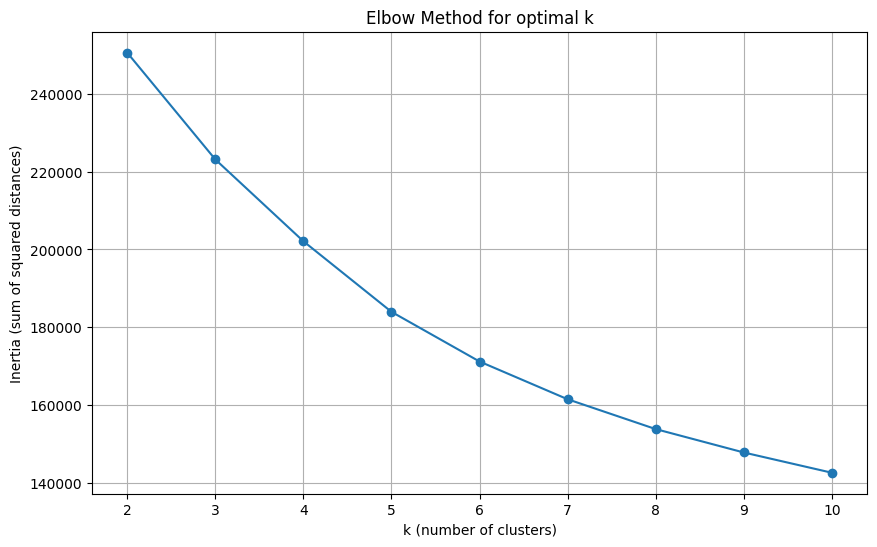

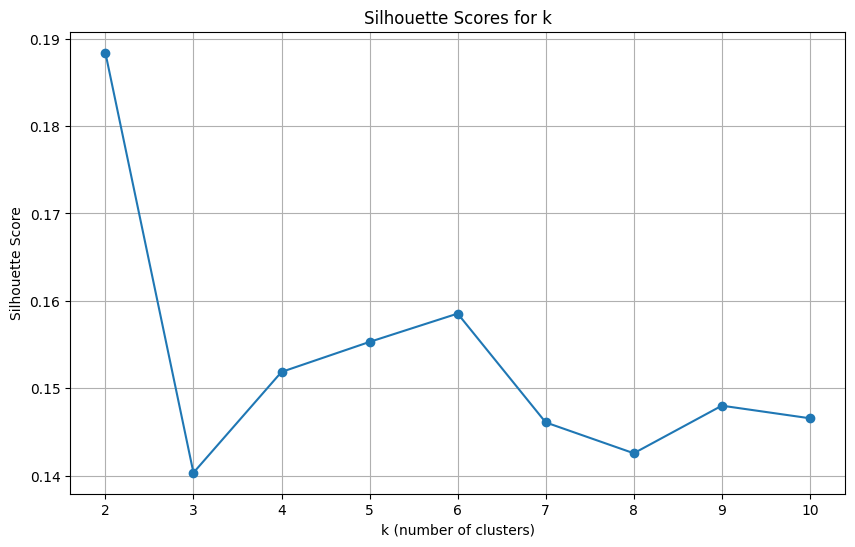

Best k by silhouette score: 2


In [44]:
# --- 7) Decide optimal number of clusters (Elbow + Silhouette) ---
inertia = []
sil_scores = []
K_range = range(2,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)
    print(f"K={k}: Inertia={inertia[-1]:.2f}, Silhouette={sil_scores[-1]:.3f}")

# Plot elbow
plt.figure()
plt.plot(list(K_range), inertia, '-o')
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia (sum of squared distances)')
plt.title('Elbow Method for optimal k')
plt.xticks(K_range)
plt.show()

# Plot silhouette
plt.figure()
plt.plot(list(K_range), sil_scores, '-o')
plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k')
plt.xticks(K_range)
plt.show()

# Choose k. We'll pick the k with the highest silhouette score by default.
best_k = K_range[np.argmax(sil_scores)]
print(f"Best k by silhouette score: {best_k}")


Cluster counts:
cluster
0     9655
1    23173
Name: count, dtype: int64


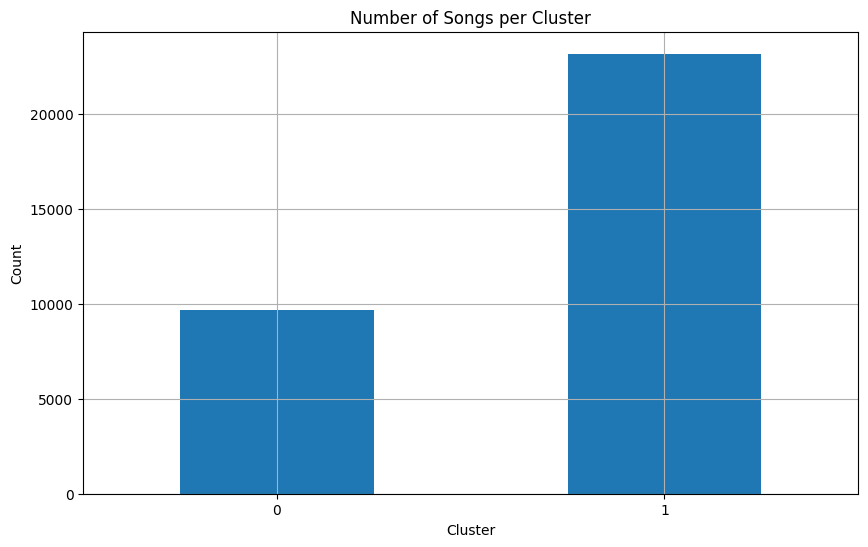

In [45]:
# --- 8) Fit final KMeans and attach cluster labels ---
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=20)
cluster_labels = kmeans_final.fit_predict(X_scaled)
df['cluster'] = cluster_labels

print('\nCluster counts:')
print(df['cluster'].value_counts().sort_index())

# Visualize cluster distribution
plt.figure()
df['cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Songs per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

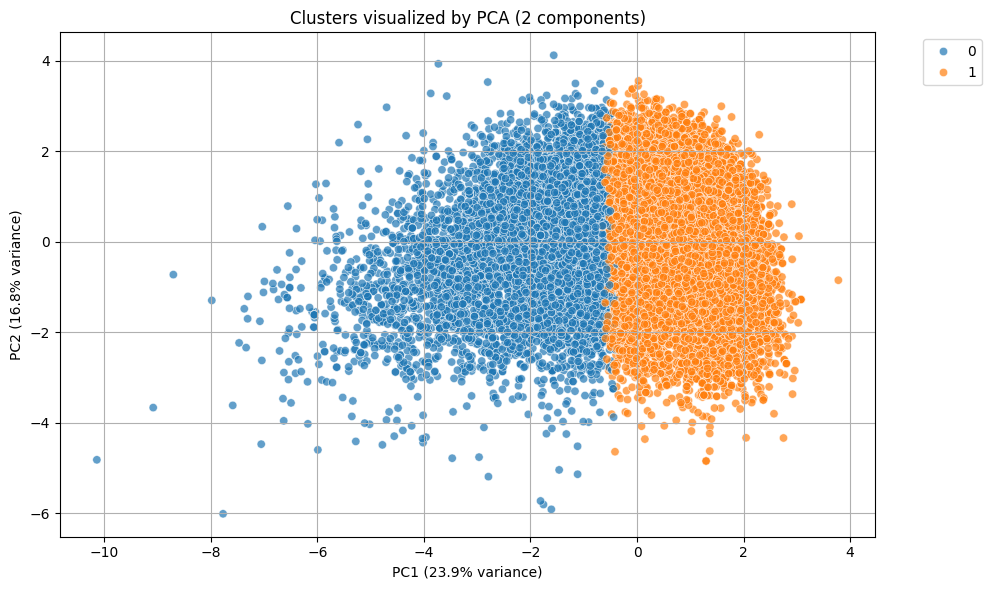

In [46]:
# --- 9) Visualize clusters with PCA (2D) ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
scatter = sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], 
                          palette='tab10', legend='full', alpha=0.7)
plt.title('Clusters visualized by PCA (2 components)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Cluster centroids (approximate):


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0,0.660424,0.492363,-9.679160,0.112325,0.372462,0.101695,0.156422,0.458912,113.387190
1,0.652517,0.784949,-5.480423,0.104846,0.092827,0.077670,0.204307,0.532178,124.022173


<Figure size 1200x800 with 0 Axes>

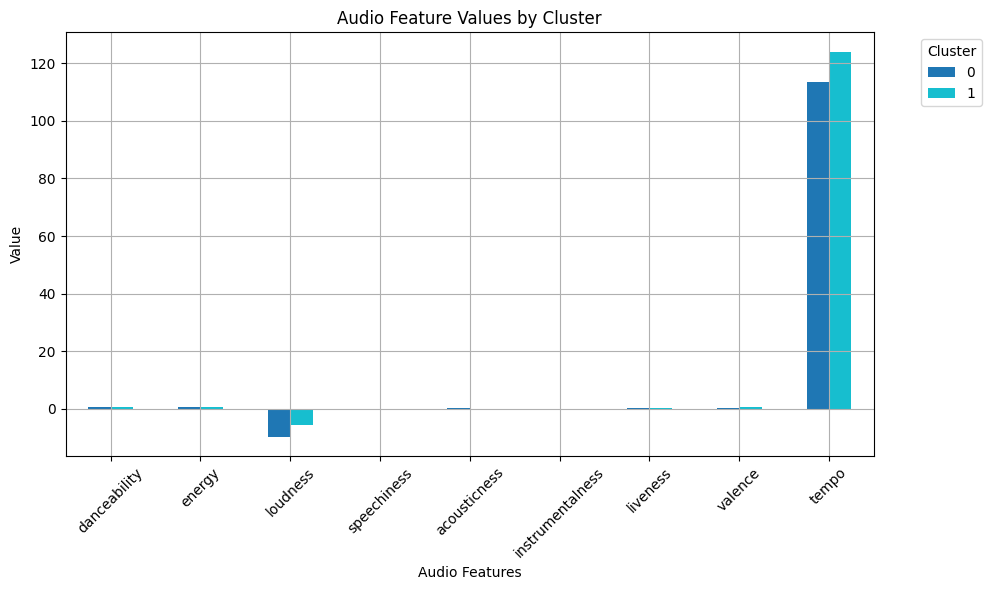

In [47]:
# --- 10) Inspect cluster centroids (in original feature space) ---
centroids_scaled = kmeans_final.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids, columns=audio_features)
centroids_df.index.name = 'cluster'

print('\nCluster centroids (approximate):')
display(centroids_df)

# Visualize cluster characteristics
plt.figure(figsize=(12, 8))
centroids_df.T.plot(kind='bar', colormap='tab10')
plt.title('Audio Feature Values by Cluster')
plt.xlabel('Audio Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [48]:
# --- 11) Recommendation functions ---
# Map index to useful info
info_cols = []
for c in ['name','title','track_name','artist_name','artists','popularity']:
    if c in df.columns:
        info_cols.append(c)
        
print('Info columns used for results:', info_cols[:3])  # Show first 3

# Build nearest neighbors model for precise recommendations
nbrs = NearestNeighbors(n_neighbors=11, metric='euclidean').fit(X_scaled)

def recommend_by_cluster(song_name, n_recs=5):
    """Recommend songs from the same cluster"""
    # Find song in dataset (case-insensitive search)
    mask = None
    possible_name_cols = [c for c in ['name','track_name','title'] if c in df.columns]
    
    for c in possible_name_cols:
        s = df[df[c].str.lower() == song_name.lower()] if song_name and c in df.columns else pd.DataFrame()
        if not s.empty:
            mask = s
            break
            
    if mask is None or mask.empty:
        # fallback: contains search
        for c in possible_name_cols:
            s = df[df[c].str.lower().str.contains(song_name.lower(), na=False)]
            if not s.empty:
                mask = s
                break
                
    if mask is None or mask.empty:
        print('Song not found by exact or partial name. Try different query or supply exact track title.')
        return pd.DataFrame()
    
    idx = mask.index[0]
    cluster = df.loc[idx, 'cluster']
    song_name_found = df.loc[idx, possible_name_cols[0]]
    artist = df.loc[idx, 'artist_name'] if 'artist_name' in df.columns else 'Unknown'
    
    print(f"Found: '{song_name_found}' by {artist} in cluster {cluster}")
    
    candidates = df[(df['cluster'] == cluster) & (df.index != idx)]
    if candidates.empty:
        print("No other songs in this cluster")
        return pd.DataFrame()
        
    recs = candidates.sample(min(n_recs, candidates.shape[0]))
    return recs[info_cols + ['cluster']]

def recommend_by_neighbors(song_name, n_recs=5):
    """Recommend songs with similar audio features using nearest neighbors"""
    # Find song in dataset
    mask = None
    possible_name_cols = [c for c in ['name','track_name','title'] if c in df.columns]
    
    for c in possible_name_cols:
        s = df[df[c].str.lower() == song_name.lower()] if song_name and c in df.columns else pd.DataFrame()
        if not s.empty:
            mask = s
            break
            
    if mask is None or mask.empty:
        for c in possible_name_cols:
            s = df[df[c].str.lower().str.contains(song_name.lower(), na=False)]
            if not s.empty:
                mask = s
                break
                
    if mask is None or mask.empty:
        print('Song not found by exact or partial name. Try different query or supply exact track title.')
        return pd.DataFrame()
    
    idx = mask.index[0]
    sample_vec = X_scaled[idx].reshape(1, -1)
    distances, indices = nbrs.kneighbors(sample_vec)
    
    # Get info about the queried song
    song_name_found = df.loc[idx, possible_name_cols[0]]
    artist = df.loc[idx, 'artist_name'] if 'artist_name' in df.columns else 'Unknown'
    print(f"Found: '{song_name_found}' by {artist}")
    
    # skip first index (itself) and get recommendations
    rec_indices = [i for i in indices[0] if i != idx][:n_recs]
    recs = df.loc[rec_indices]
    return recs[info_cols + ['cluster']]

# Test the recommendation functions with a sample song
print("Testing recommendation functions...")
sample_song = df.iloc[0]['name'] if 'name' in df.columns else df.iloc[0]['track_name']
print(f"\nTesting with sample song: {sample_song}")

print("\nCluster-based recommendations:")
cluster_recs = recommend_by_cluster(sample_song, 3)
display(cluster_recs)

print("\nNearest neighbors recommendations:")
nn_recs = recommend_by_neighbors(sample_song, 3)
display(nn_recs)

Info columns used for results: ['track_name']
Testing recommendation functions...

Testing with sample song: I Don't Care (with Justin Bieber) - Loud Luxury Remix

Cluster-based recommendations:
Found: 'I Don't Care (with Justin Bieber) - Loud Luxury Remix' by Unknown in cluster 1


,track_name,cluster
26881,Without You,1
14,Summer Days (feat. Macklemore & Patrick Stump ...,1
2705,Watch Out For This (Bumaye),1



Nearest neighbors recommendations:
Found: 'I Don't Care (with Justin Bieber) - Loud Luxury Remix' by Unknown


,track_name,cluster
29679,Never Really Over - Syn Cole Remix,1
29729,Raincoat - Ashworth Remix,0
4959,Name & Number,1


In [52]:
try:
    outpath = 'spotify_with_clusters.csv'
    df.to_csv(outpath, index=False)
    print(f"Saved dataset with clusters to {outpath}")
except Exception as e:
    print(f"Error saving dataset: {e}")

Saved dataset with clusters to spotify_with_clusters.csv


In [51]:
# --- 14) Summary and interactive recommendations ---
print('\n--- Analysis Summary ---')
print('Rows in dataset:', df.shape[0])
print('Audio features used:', audio_features)
print('Chosen number of clusters (k):', best_k)
print('Cluster sizes:')
print(df['cluster'].value_counts().sort_index())

# Interactive recommendation section
print('\n' + '='*50)
print('RECOMMENDATION SYSTEM READY')
print('='*50)
print('Use the following functions to get recommendations:')
print('1. recommend_by_cluster("song name") - Songs from the same cluster')
print('2. recommend_by_neighbors("song name") - Songs with similar audio features')
print('\nExample: recommend_by_cluster("Shape of You")')


--- Analysis Summary ---
Rows in dataset: 32828
Audio features used: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
Chosen number of clusters (k): 2
Cluster sizes:
cluster
0     9655
1    23173
Name: count, dtype: int64

RECOMMENDATION SYSTEM READY
Use the following functions to get recommendations:
1. recommend_by_cluster("song name") - Songs from the same cluster
2. recommend_by_neighbors("song name") - Songs with similar audio features

Example: recommend_by_cluster("Shape of You")
